In [1]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [2]:
#Se define el oscilador, y'=v,v'=-omegay, y_v=(y,v)=(0,1)
def osc(y_v,t,omega2=1.):
    dy=y_v[1]
    dv=-omega2*y_v[0]
    return array([dy,dv])

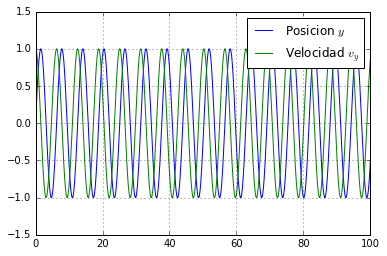

In [15]:
# Obtener raices
t=linspace(0,100,1000)
ini=array([0.,1.])
sol=odeint(osc,ini,t)
plot(t,sol[:,0],label='Posicion $y$') #posicion
plot(t,sol[:,1],label='Velocidad $v_y$') #velocidad
legend()
grid(True)
show()

In [4]:
ind=49
ti,pto_i=t[ind],sol[ind] #tiempo inicial y punto inicial
error=1e-5
while abs(pto_i[0])>error:
    tip1=ti-(pto_i[0]/pto_i[1]) #ti p+1
    paso=odeint(osc,pto_i,[ti,tip1])
    ti,pto_i=tip1,paso[-1]
print ti,pto_i

9.42477818933 [  3.17433420e-12  -9.99999923e-01]


In [5]:
def root_trayec(func,pto_i,ti,error=1e-5):#buscar raiz de la trayectoria
    while abs(pto_i[0])>error:
        tip1=ti-(pto_i[0]/pto_i[1]) #ti p+1
        paso=odeint(func,pto_i,[ti,tip1])
        ti,pto_i=tip1,paso[-1]
    return ti,pto_i

In [12]:
#ind=10
#ti,pto_i=t[ind],sol[ind] #tiempo inicial y punto inicial
#t_raiz,punto=root_trayec(osc,pto_i,ti)
#print t_raiz,punto

#para ver si hay raices
num=100 #numero de raices
raices=zeros(num) #se desea diez raices
puntos=zeros((num,2))
j=0
for i in range(len(t)-1): #longitud total, checar si en componente x hay cambio de sigo, 
    #si hay entonces se obtiene la raiz de dicho punto, n-1 puntos
    if (sol[i][0]*sol[i+1][0])<0: #componente en cero, ver si hay raices
        raices[j],puntos[j]=root_trayec(osc,sol[i],t[i])
        j+=1
raices,puntos=raices[0:j],puntos[0:j]
print "Se encuentran raices",raices,puntos

Se encuentran raices [  3.1415928    6.28318547   9.42477936  12.56637086  15.70796354
  18.84956589  21.9911489   25.1327417   28.27433424  31.41592691
  34.55752361  37.69911225  40.84070492  43.98229759  47.12389026
  50.2654841   53.40707561  56.54866828  59.69027049  62.83185362
  65.97344641  69.11503896  72.25663163  75.39822826  78.53981697
  81.68140964  84.82300231  87.96459498  91.10618879  94.24778033
  97.389373  ] [[  9.53149235e-17  -9.99999974e-01]
 [  1.04525289e-13   1.00000001e+00]
 [ -1.19489147e-06  -1.00000013e+00]
 [ -5.53817246e-16   1.00000016e+00]
 [  4.49811195e-12  -1.00000022e+00]
 [  9.66826789e-06   1.00000030e+00]
 [ -1.44675938e-15  -1.00000035e+00]
 [  1.36770829e-07   1.00000040e+00]
 [  2.37372513e-16  -1.00000045e+00]
 [ -1.54177494e-12   1.00000048e+00]
 [ -4.03324433e-06  -1.00000055e+00]
 [ -1.99734435e-15   1.00000059e+00]
 [  3.18382386e-12  -1.00000062e+00]
 [ -2.06054317e-15   1.00000069e+00]
 [ -1.83633490e-13  -1.00000072e+00]
 [  1.1630327

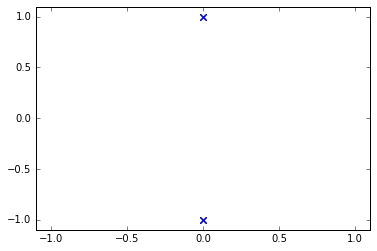

In [13]:
xlim([-1.1,1.1]),ylim([-1.1,1.1])
plot(puntos[:,0],puntos[:,1],'x')
show()

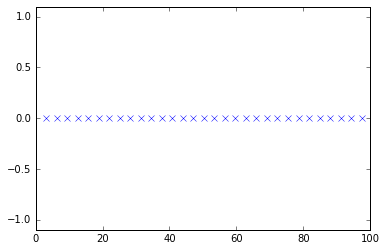

In [16]:
ylim([-1.1,1.1])
plot(raices,puntos[:,0],'x')

In [27]:
#Se define el oscilador con friccion, y'=v,v'=-omegay, y_v=(y,v)=(0,1)
def osc_fric(y_v,t,omega2=1.):
    dy=y_v[1]
    dv=-omega2*y_v[0]-0.01*y_v[1]
    return array([dy,dv])

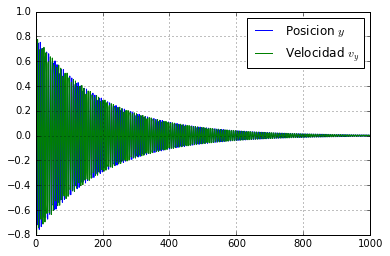

In [28]:
# Obtener raices
t=linspace(0,1000,1000)
ini=array([0.1,0.8])
sol=odeint(osc_fric,ini,t)
plot(t,sol[:,0],label='Posicion $y$') #posicion
plot(t,sol[:,1],label='Velocidad $v_y$') #velocidad
legend()
grid(True)
show()

In [29]:
#ind=10
#ti,pto_i=t[ind],sol[ind] #tiempo inicial y punto inicial
#t_raiz,punto=root_trayec(osc,pto_i,ti)
#print t_raiz,punto

#para ver si hay raices
num=len(t) #numero de raices
raices=zeros(num) #se desea diez raices
puntos=zeros((num,2))
j=0
for i in range(len(t)-1): #longitud total, checar si en componente x hay cambio de sigo, 
    #si hay entonces se obtiene la raiz de dicho punto, n-1 puntos
    if (sol[i][0]*sol[i+1][0])<0: #componente en cero, ver si hay raices
        raices[j],puntos[j]=root_trayec(osc_fric,sol[i],t[i])
        j+=1
raices,puntos=raices[0:j],puntos[0:j]
print "Se encuentran raices",raices,puntos

Se encuentran raices [   3.01735378    6.15898573    9.30061715   12.44223878   15.58388154
   18.72551352   21.86714536   25.00877747   28.15040932   31.29204102
   34.43366734   37.57530516   40.7169371    43.85856898   47.00020789
   50.1418329    53.28346474   56.42509369   59.56672872   62.70836066
   65.84999256   68.9916257    72.13325643   75.27488833   78.41651871
   81.55815224   84.69978419   87.84141611   90.98304809   94.12468486
   97.26631189  100.40794306  103.54956091  106.69120775  109.83283968
  112.97447151  116.11610358  119.25773547  122.39936706  125.5409912
  128.68263133  131.82426327  134.96589513  138.10754283  141.24915907
  144.39079085  147.53241857  150.67405493  153.81568686  156.95731877
  160.09895396  163.24058271  166.38221457  169.52384427  172.66547853
  175.80711049  178.94874242  182.09037487  185.23202964  188.37363828
  191.5152691   194.65688196  197.79853417  200.94016613  204.08179805
  207.22343019  210.36506202  213.50669342  216.64831466 

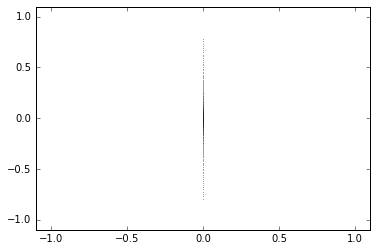

In [37]:
xlim([-1.1,1.1]),ylim([-1.1,1.1])
plot(puntos[:,0],puntos[:,1],'.',markersize=0.5)
show()

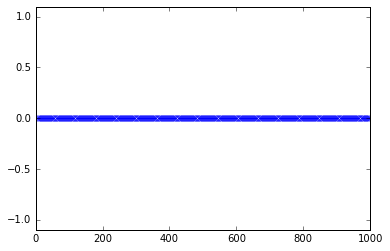

In [31]:
ylim([-1.1,1.1])
plot(raices,puntos[:,0],'x')

In [40]:
#Se define el oscilador con friccion, y'=v,v'=-omegay, y_v=(y,v)=(0,1)
def osc_fric_2(y_v,t,omega2=1.):
    dy=y_v[1]
    dv=-omega2*y_v[0]-0.01*y_v[1]+0.5*sin(2*t)
    return array([dy,dv])

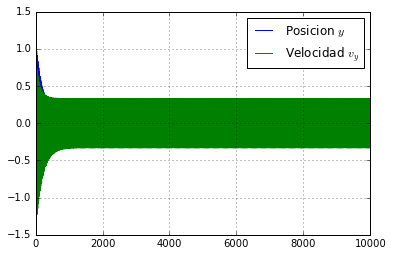

In [55]:
# Obtener raices, no proporciona informacion de como cuantificar
#Se caracteriza la trayectoria por medio de las raices o el espacio fase, realizando cortes donde se queda las raices donde pasan por cero
#Analiza si hay tendencia en espacio fase o espacio tiempo,si hay tendencias, como en las siguientes graficas.
#Si se tienen dos trayectorias, se ve la parte asintotica de cada una, donde una tendra algo transitorio, así se puede medir su distancia entres ambas
#cuantifica en si, separacion de trayectorias
t=linspace(0,10000,10000)
ini=array([0.1,0.8])
sol=odeint(osc_fric_2,ini,t)
plot(t,sol[:,0],label='Posicion $y$') #posicion
plot(t,sol[:,1],label='Velocidad $v_y$') #velocidad
legend()
grid(True)
show()

In [56]:
#ind=10
#ti,pto_i=t[ind],sol[ind] #tiempo inicial y punto inicial
#t_raiz,punto=root_trayec(osc,pto_i,ti)
#print t_raiz,punto

#para ver si hay raices
num=len(t) #numero de raices
raices=zeros(num) #se desea diez raices
puntos=zeros((num,2))
j=0
for i in range(len(t)-1): #longitud total, checar si en componente x hay cambio de sigo, 
    #si hay entonces se obtiene la raiz de dicho punto, n-1 puntos
    if (sol[i][0]*sol[i+1][0])<0: #componente en cero, ver si hay raices
        raices[j],puntos[j]=root_trayec(osc_fric_2,sol[i],t[i])
        j+=1
raices,puntos=raices[0:j],puntos[0:j]
print "Se encuentran raices",raices,puntos

Se encuentran raices [  3.07225975e+00   6.15783040e+00   9.35598616e+00 ...,   9.99654449e+03
   9.99811529e+03   1.00012569e+04] [[ -2.96536127e-09  -1.45107284e+00]
 [ -3.40424659e-07   7.79826930e-01]
 [ -2.76165909e-06  -1.41644571e+00]
 ..., 
 [  1.18021095e-08  -3.33325808e-01]
 [ -4.13034207e-09   3.33325895e-01]
 [  2.43945573e-06   3.33325820e-01]]


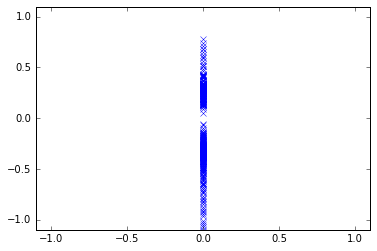

In [57]:
xlim([-1.1,1.1]),ylim([-1.1,1.1])
plot(puntos[:,0],puntos[:,1],'x')
show()

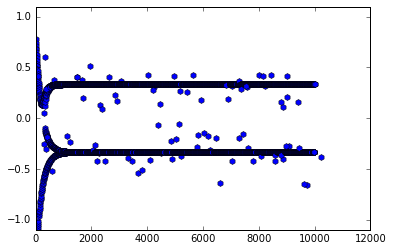

In [61]:
ylim([-1.1,1.1])
plot(raices,puntos[:,1],'h')
show()